<a href="https://colab.research.google.com/github/anirudh217sharma/fall2019/blob/master/MP1_02142020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1 - CS498 Data Science and Analytics

<b>Group Members: Aniruddha Sharma (ashar29),  Anunay Sharma (anunays2), Badrinarayanan Rajasekaran (br17)</b>

In [0]:
#If you need to change the directory, then we use the os package
import os 
os.chdir ('C:\\Users\\Anunay\\Documents\\CS 498\\MP\\MP1\\')

In [0]:
#Import all the necessary packages for this analysis

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
%matplotlib inline

In [0]:
# Upload data file from your local drive

from google.colab import files

uploaded = files.upload()

Saving mp1_av_disengagements.csv to mp1_av_disengagements (1).csv


In [0]:
df_diseng = pd.read_csv("mp1_av_disengagements.csv") #pd.read_csv to import the notebook
df_diseng.head() #Displays the top n rows of the dataset

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [0]:
uploaded = files.upload()

In [0]:
df_miles = pd.read_csv('mp1_av_totalmiles.csv')
df_miles.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


# 2. Summarize the following information

<b>a. Total number of AV disengagements over the entire duration of available data</b>

In [0]:
print(f'Total number of AV disengagements over the entire duration of available data are {df_miles["total number of disengagements"].sum(axis = 0)}') 

Total number of AV disengagements over the entire duration of available data are 1024


<b> b. Number of unique months that have recorded AV disengagements</b>

In [0]:
df_diseng['month']= df_diseng['Month'].apply(lambda x:x.split('-')[1]) #Split the data so that month and the date are apart
df_diseng['month'].nunique() #Count the unique months now
print(f'Number of unique months that have recorded AV disengagements are {df_diseng["month"].nunique()}')

Number of unique months that have recorded AV disengagements are 12


<b> c. List of unique locations of AV disengagements</b>

In [0]:
print(f'There are {df_diseng["Location"].nunique()} locations namely {list(df_diseng["Location"].unique())[0]} and {list(df_diseng["Location"].unique())[1]}')  

There are 2 locations namely urban-street and highway


<b>d. Number of unique causes for AV disengagements</b>

In [0]:
print(f'Number of unique causes for AV disengagements are {df_diseng["Cause"].nunique()}')

Number of unique causes for AV disengagements are 10


<b>e) Columns with missing values in the dataset</b>

Lets visualize the missing values in the datasets through a missing map

<b>Disengagements dataset</b>

Text(0.5, 1, 'Missing map of Disengagement data')

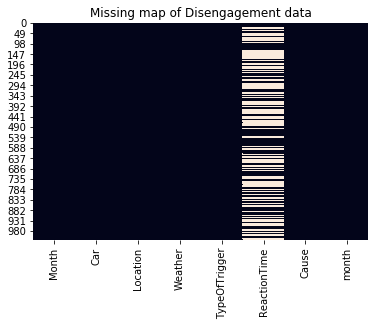

In [0]:
#We create a heatmap which distinguishes the columns with missing values
sns.heatmap(df_diseng.isnull(), cbar=False)
plt.title("Missing map of Disengagement data")

We can see above that the only column which has missing values is <b>Reaction time</b>
Lets see how many of null values are actually there

In [0]:
print(f'The number of missing values in the reaction time column are {len(df_diseng[df_diseng["ReactionTime"].isnull()])}')

The number of missing values in the reaction time column are 532


<b>Total miles dataset</b>

Text(0.5, 1, 'Missing map of Total miles data')

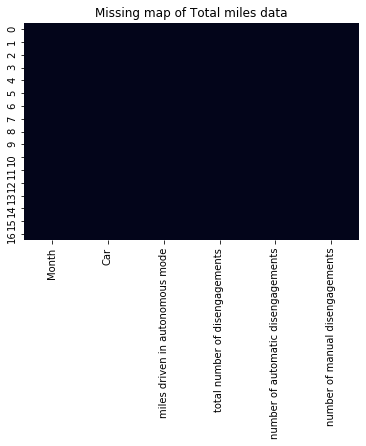

In [0]:
sns.heatmap(df_miles.isnull(), cbar=False)
plt.title("Missing map of Total miles data")


We can see above that there are no column which has missing values in this dataset

<b>3) Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?</b>

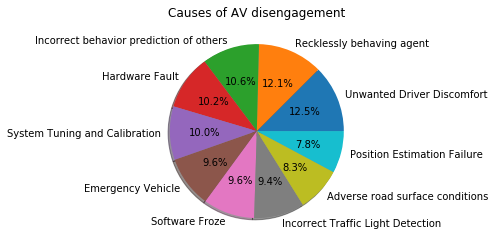

In [0]:
cause = df_diseng["Cause"].value_counts()  #Counts the occurences of different causes of disengagement
cause
plt.pie(cause, labels=cause.keys(),autopct = '%0.1f%%', shadow = True,radius =1) #produces the piechart using matplotlib
plt.title("Causes of AV disengagement")
plt.show()

From the above pie chart we can see that <b>Unwanted Driver discomfort</b> and <b>Recklessly behaving agent</b> are the two leading causes of disengagements

<b> 4. Visualize the trend of disengagement/mile over time with monthly granularity. 
How would you describe the trend? Are AVs maturing over time?</b>

In [0]:
df1=df_miles.groupby(['Month']).sum()[['total number of disengagements','miles driven in autonomous mode']]
df1=df1.reset_index(0)
df1['month']= df1['Month'].apply(lambda x:x.split('-')[1]) #Splits the column to get the month and date separately
df1["month"] = pd.to_datetime(df1.month, format='%b', errors='coerce').dt.month #Converts the column into date
df1['year']= df1['Month'].apply(lambda x:x.split('-')[0]) #Splits the column to get the month and date separately

df1['disengagement/mile']=df1['total number of disengagements']/df1['miles driven in autonomous mode']
df1 = df1.sort_values(by=["year","month"],ascending=True)
df1['date']=df1['Month'].apply(lambda x:x.split('-')[1])+"-"+df1['year'].astype(str)

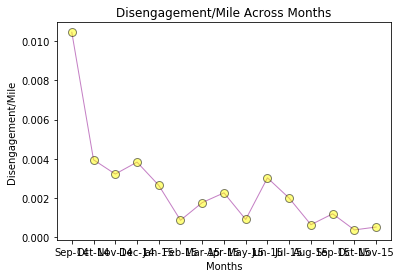

In [0]:
#We leverage matplotlib section to plot a line to understand the trend over months
plt.plot(df1['date'],df1['disengagement/mile'],'#8B008B',alpha=0.5,lw=1, ls='-', marker='o', markersize=8, markerfacecolor="yellow",markeredgecolor='black')
plt.xlabel('Months')
plt.ylabel('Disengagement/Mile')
plt.title('Disengagement/Mile Across Months')
plt.show()
#plt.xticks(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])

<b>The trend of disengagement/mile decreases over the course of time. We observe occassional peaks in disengagements but overall the trend is declining. Thus we can say that the AVs appear to have matured over time. It has the highest disengagement per mile in the month of September 2014 and lowest being November 2015</b>

## TASK 1

<b>1. What do the following distributions signify about samples drawn from it 
    a. Gaussian distribution 
    b. Exponential distribution 
    c. Weibull distribution</b>

<b>Regardless of the type of distribution, ths sample distribution depends on the sample size taken from the population. For instance, when we take n=10 from any of these distributions, it looks very disconnected with mean and variance being different from the original distribution. As the sample size increases, the distribution resembles close to the parent distribution and mean of the sample converges towards the mean of the entire population (Central Limit Theorem)<br>

References:
1. https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4_md/SeniorTopic4b.html#content_6
2. https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4b/4b_2content_7.html#content_8
</b>

<b>2. Distribution of Reaction Time<b>

Text(0.5, 1.0, 'Distribution of Reaction Time')

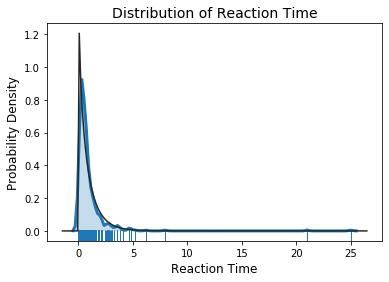

In [0]:
sns.distplot(df_diseng['ReactionTime'].dropna(), hist = False, kde = True,rug=True,fit=stats.weibull_min,  #Displays the probability density of the distribution which can be above 1
                 kde_kws = {'shade': True, 'linewidth': 3}) 
plt.xlabel('Reaction Time', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of Reaction Time', fontsize=14)

<b>Distribution of Reaction time removing the extreme values(>4) for better visualization</b>

Text(0, 0.5, 'Probability density')

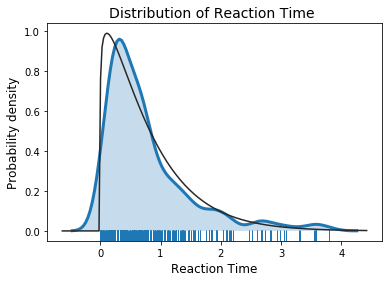

In [0]:
 df_diseng2 = df_diseng[df_diseng['ReactionTime']<=4]

sns.distplot(df_diseng2['ReactionTime'], hist = False, kde = True,rug=True,fit=stats.weibull_min,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Distribution of Reaction Time ', fontsize=14)
plt.xlabel('Reaction Time', fontsize=12)
plt.ylabel('Probability density', fontsize=12)

<b>The reaction time follows a weibull distribution. The distribution signifies that most of the drivers having a reaction time of 1-2s post which there is a very less population.
<br> 
References:<br>
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm </b>

<b>3a. Average Reaction for entire duration of the dataset</b>

In [0]:
df_diseng.groupby('Location').mean()

,ReactionTime
Location,
highway,1.48000
urban-street,0.92865


<b>4. Perform a hypothesis testing at a 0.05 significance level</b>

Assumptions: 
From the given question, we have the mean of both the populations (AV and Non AV cars)
Since no additional information is given, we assume that both the population has constant variance.

Null hypothesis :The average reaction time for humans in Non AV cars is same as AV cars

Alternative hypothesis : The average reaction time for humans in Non AV cars is different from AV cars



In [0]:
from scipy import stats
###We assume both the population have constant variance
#se - standard deviation of the population
se = df_diseng['ReactionTime'].std() /np.sqrt(len(df_diseng['ReactionTime']))

Mean_of_NON_AV=1.09
Mean_of_AV=df_diseng['ReactionTime'].mean()
#t=x-u/se
ttest=(Mean_of_NON_AV-Mean_of_AV)/se  
print(round(ttest,3))

3.028


In [0]:
# degrees of freedom
df = len(df_diseng['ReactionTime'])-1

from scipy.stats import t
alpha=0.05 #Significance level given in the question
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(ttest), df)) * 2
if p<0.05:
    print("We reject the Null Hypothesis : The average reaction time for humans in Non AV cars is different as AV cars")
else:
    print("We fail  to reject the Null Hypothesis :The average reaction time for humans in Non AV cars same as AV cars")


We reject the Null Hypothesis : The average reaction time for humans in Non AV cars is different as AV cars


<b> 5. Plot the probability distribution of disengagements/mile with monthly granularity</b>

Text(0, 0.5, 'Probability density')

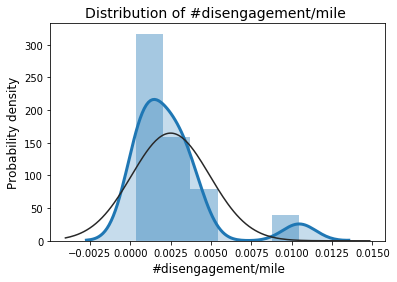

In [0]:
sns.distplot(df1['disengagement/mile'], hist = True, kde = True, fit=stats.norm,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Distribution of #disengagement/mile ', fontsize=14)
plt.xlabel('#disengagement/mile', fontsize=12)
plt.ylabel('Probability density', fontsize=12)

<b>The above figure follows more or less a normal distribution (Except that it has a local peak due to data). An additional support to normality are the tails of the distribution which look symmetric unlike a skewed distribution</b>

# TASK 2 

 Assumptions :
1. There can be at most one disengagement in a mile
2. A day can be either clear or cloudy, but not both. The probability of a day being clear in California is 72% 
3. The AV is equally likely to drive on a cloudy day as on a clear day.

<b>a.)<b> 

The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a <b>Bernoulli<b> distribution

<b>b.) probability of disengagement per mile on a cloudy day.</b>                                                                                

Let ,
Based on assumption 2 we have,

Probability of a day being clear in california be denoted as <b>P(Clear)=0.72</b>
    
Probability of a day being clear in california be denoted as <b>P(Cloudy)=0.28</b>
    
Probability of a disengagement/mile in california be denoted as <b>P(DM)</b>
    
We have to find : <b>P(DM | cloudy)</b>

 <b>P(DM | cloudy) = [P(cloudy | DM) * P(DM)] / P(Cloudy) - using bayes theorem</b>
 
 Calculating: P(cloudy | DM) , let it be x 



In [0]:
x = len(df_diseng[df_diseng['Weather']=='cloudy']) /len(df_diseng)
print('Probability: ', x)

Probability:  0.8154296875


<b>P(cloudy/DM) = 0.82 </b>

Calculating : P(DM) , let it be y

In [0]:
y=df_miles['total number of disengagements'].sum()/df_miles['miles driven in autonomous mode'].sum()

Calculating : P(DM) , let it be y

In [0]:
y=df_miles['total number of disengagements'].sum()/df_miles['miles driven in autonomous mode'].sum()

<b> P(DM) = 0.002026803687040926 </b>

<b>P(DM | cloudy) =[ 0.8154296875 * 0.002026803687040926 ] / 0.28</b>

<b>P(DM | cloudy)  = 0.005903</b>



<b>probability of disengagement per mile on a cloudy day is 0.0059<b>

<b> c.) probability of disengagement per mile on a cloudy day.</b>

We have to find :<b> P(DM | clear) </b>

<b>P(DM | clear) = [P(clear | DM) * P(DM)] / P(Clear)</b> - using bayes theorem

Calculating: P(clear | DM) , let it be x




In [0]:
x = len(df_diseng[df_diseng['Weather']=='clear']) /len(df_diseng)

P(DM) will be same as part a)

<b>P(DM) = 0.002026803687040926</b>

<b>P(DM | clear) =[ 0.1845703125 * 0.002026803687040926 ] / 0.72</b>

<b>P(DM | clear)= 0.00052</b>


<b>probability of disengagement per mile on a cloudy day is 0.00052<b>


<b> d.) probability of automatic disengagement per mile on a cloudy day.</b>

<b>Probability of a automatic disengagement/mile in california be denoted as P(ADM)</b>

<b> P(ADM | Cloudy) = [P(Cloudy | ADM) * P(ADM)] / P(Cloudy) </b>

Calculating: P(cloudy | ADM) , let it be x


In [0]:
x=len(df_diseng[(df_diseng['Weather']=='cloudy') & (df_diseng['TypeOfTrigger']=='automatic')]) / len(df_diseng[df_diseng['TypeOfTrigger']=='automatic'])

Calculating: P(cloudy | ADM) , let it be x

<b>P(cloudy/ADM) = 0.8052738336713996 </b>

Calculating : P(ADM) , let it be y

In [0]:
y=df_miles['number of automatic disengagements'].sum()/df_miles['miles driven in autonomous mode'].sum()

<b>P(ADM)= 0.0009757951344835708 </b>

<b>P(ADM | cloudy) =[ 0.8052738336713996 * 0.0009757951344835708 ] / 0.28</b>

<b>P(ADM | cloudy) = 0.002806</b>

<b>probability of automatic disengagement per mile on a cloudy day is 0.0028<b>


<b>probability of automatic disengagement per mile on a clear day.</b>

<b> P(ADM | Clear) = [P(Clear | ADM) * P(ADM)] / P(Clear) </b>

Calculating: P(cloudy/ADM) , let it be x

In [0]:
x=len(df_diseng[(df_diseng['Weather']=='clear') & (df_diseng['TypeOfTrigger']=='automatic')]) / len(df_diseng[df_diseng['TypeOfTrigger']=='automatic'])

<b>P(clear | ADM) = 0.1947261663286004  </b>

We have P(ADM) calculated above

<b>P(ADM)= 0.0009757951344835708 </b>

<b> P(ADM | Clear) = [x * 0.0009757951344835708] / 0.72

<b> P(ADM | Clear) = 0.000264 </b>

<b>e.) How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? </b>

<b>The above distribution can be represented as a binomial distribution which can then be approximated to a normal distribution 
using Central Limit Theorem</b>

<b> The normal distribution will have mean = n * p  and standard deviation = sqrt(np(1-p)) , where n is the number of trials 
and p is probability of success</b>

<b>Given n =12000 , p= 0.005903</b>  from the data
        

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

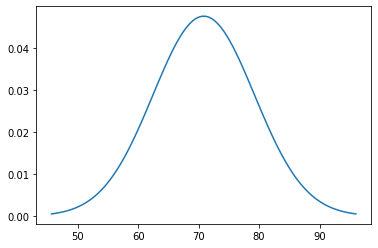

1.9776115012499175e-21

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import scipy

mu = (12000*0.005903)
variance = (12000*0.005903) * (1-0.005903)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

x=150 ##given 
z = ( x - mu ) / sigma
p_values = scipy.stats.norm.sf(abs(z))
p_values

<b>2.) a.) </b>

<b>Normal distribution represents an approximate representation of the data in the hypotheses test </b>

In [0]:
# DO NOT EXECUTE THIS CELL IN COLAB. LET IT BE GUYS!
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# img=mpimg.imread('Normal_dist.PNG')
# imgplot = plt.imshow(img)

The application of the normal distribution comes from assessing data points in terms of the standard deviation. We can determine how anomalous a data point is based on how many standard deviations it is from the mean. The normal distribution has the following helpful properties:
68% of data is within ± 1 standard deviations from the mean
95% of data is within ± 2 standard deviations from the mean
99.7% of data is within ± 3 standard deviations from the mean

Reference -https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687

<b>b.)</b>

<b>It is not necessary that rejecting the NULL hypothesis means accepting the alternate hypothesis. 
It depends on the formulation of the experiment and a relationship may exist between 2 phenonmena that is not identified
by the experiment

For example, there can be a set of hypothesis such as:

H0: u1=u2

HA: u1 > u2

There is a solution of u1 < u2 outside the scope of this hypothesis which might be left out as a part of this experiment</b>


<b> 3.) At a 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety? [Hint: Use a Z-test for testing this hypothesis]. </b>

In [0]:
Null Hypothesis : The AV on cloudy days has same disengagement on clear days

<b> Null Hypothesis : The AV on cloudy days has same disengagement on clear days</b>

<b> Alternative Hypothesis : The AV has more disengagement on cloudy days than clear days </b>

In [0]:
import math as m

Number_of_cloudy_disengagements=835
Number_of_clear_disengagements=189

Prob_cloudy_day=0.28
Prob_clear_day=(1-0.28)

Mean_cloudy_disengagements= 835*0.28
std_cloudy_disengagements= m.sqrt(835*0.28*0.72)
Mean_clear_disengagements= 189*0.72
std_clear_disengagements= m.sqrt(835*0.72*0.28)

z=(Mean_cloudy_disengagements-Mean_clear_disengagements)/m.sqrt(Mean_cloudy_disengagements**2/835+Mean_clear_disengagements**2/189)
z

7.6436739904912026

In [0]:
from scipy.stats import t
df=Number_of_cloudy_disengagements+Number_of_clear_disengagements-1
alpha=0.05#Significance level given in the question
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(z), df)) * 2
if p<0.05:
    print("We reject the Null Hypothesis : The AV on cloudy days has same disengagement on clear days")
else:
    print("We fail  to reject the Null Hypothesis : The AV has more disengagement on cloudy days than clear days")

We reject the Null Hypothesis : The AV on cloudy days has same disengagement on clear days


<b>4. Conditional probability on reaction time</b>

<b>Conditional Probability :  P(Dm | Cloudy)=P(Dm,Cloudy | P(C)</b>

In [0]:
Prob1= len(df_diseng[(df_diseng['ReactionTime']>0.6) & (df_diseng['TypeOfTrigger']=='automatic') & (df_diseng['Weather']=='cloudy')])/len(df_diseng[(df_diseng['TypeOfTrigger']=='automatic') & (df_diseng['Weather']=='cloudy')])
print("The Probability of disengagement per mile on a cloudy day is {}".format(round(Prob1,2)))

The Probability of disengagement per mile on a cloudy day is 0.47


<b>Conditional Probability :  P(Dm | Clear)=P(Dm,Clear)/P(Clear)</b>

In [0]:
Prob2= len(df_diseng[(df_diseng['ReactionTime']>0.9) & (df_diseng['TypeOfTrigger']=='automatic') & (df_diseng['Weather']=='clear')])/len(df_diseng[(df_diseng['TypeOfTrigger']=='automatic') & (df_diseng['Weather']=='clear')])
print("The Probability of disengagement per mile on a cloudy day is {}".format(round(Prob2,2)))

The Probability of disengagement per mile on a cloudy day is 0.28


<b>5. Probability on Accident per mile</b>

<b>Theorem of total probability would be <br>
P(accident per mile)=P(Dm | Cloudy)*P(Cloudy) + P(Dm | clear)*P(clear)</b>

In [0]:
Prob3 = Prob1*0.28+Prob2*0.72
print("The Probability of Accident per mile on a cloudy day is {}".format(round(Prob3,2)))

The Probability of Accident per mile on a cloudy day is 0.34


<b>6. The probability of a human driver causing a car accident is 2x10-6 [4]. How do AVs compare to human drivers?<br>
Justify your conclusion and explain its consequences </b>

<b>The probability of human driver causing a car accident is 2*10^-4 while the probability of AV for the same comes to be 0.34. There is a bigger risk associated with AV's as they can't be trained with all the possible scenarios of accident that happens in the real life.

On the other hand, the humans react to any known/unknown signs of danger and their sudden response would to avoid accidents and mitigate the impact

Training the system with lesser data and of low variance can result in high probability of fatalities happening in the road. The system needs to be trained with different conditions like the weather, road and cities 

<b>7. KS Test</b>

Initially, we need to formulate the hypothesis for this test
H0: Both the samples (clear and cloudy) from the same distribution
HA: Both the samples (clear and cloudy) doesn't from the same distribution                         

In [0]:
from scipy import stats

Reaction_time_cloudy=df_diseng[(df_diseng['Weather']=='cloudy')]['ReactionTime']
Reaction_time_clear=df_diseng[(df_diseng['Weather']=='clear')]['ReactionTime']

stats.ks_2samp(Reaction_time_cloudy, Reaction_time_clear)


Ks_2sampResult(statistic=0.05633178088267909, pvalue=0.6872561980283936)

<b>
The given significance level is 0.1 (alpha) From the ks test, we get the P value as 0.7

Decision rule:
If pvalue < alpha, then we reject the NULL hypothesis<br>
else we fail to reject the NULL hypothesis or accept the alternate hypothesis<br>

Here 0.7>0.1,so we fail to reject the NULL hypothesis i.e. both the samples come from the same distribution <br>

We can conclude that the weather be it cloudy or clear doesn't have any impact on the disengagement reaction time.</b>

<b>Task 3</b>

<b>1. Modify your pandas data frame to include a ‘Class’ column</b>

In [0]:
df_diseng.loc[df_diseng['Cause'].isin (["Incorrect behavior prediction of others",
                                        "Recklessly behaving agent",
                                       "Unwanted Driver Discomfort"]),'class'] = 'Controller'
df_diseng.loc[df_diseng['Cause'].isin (["Adverse road surface conditions",
                                        "Emergency Vehicle",
                                       "Position Estimation Failure",
                                       "Incorrect Traffic Light Detection"]),'class'] = 'Perception System'

df_diseng.loc[df_diseng['Cause'].isin (["System Tuning and Calibration",
                                        "Hardware Fault",
                                       "Software Froze"]),'class'] = 'Computer System'
                                       

<b>Split the data randomly into training and testing (80-20 split). Use the fields ‘Location’, ‘Weather’, and ‘TypeOfTrigger’ as features and use ‘Class’ as assigned in the previous question as the label</b>

In [0]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_diseng['Location_encoded']=le.fit_transform(df_diseng['Location'])
df_diseng['Weather_encoded']=le.fit_transform(df_diseng['Weather'])
df_diseng['TypeOfTrigger_encoded']=le.fit_transform(df_diseng['TypeOfTrigger'])
df_diseng['class_encoded']=le.fit_transform(df_diseng['class'])


In [0]:
from sklearn.model_selection import train_test_split
X=df_diseng[['Location_encoded','Weather_encoded','TypeOfTrigger_encoded']]
y=df_diseng[['class_encoded']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101) 


<b>3. Using the training dataset, create a NB model to identify the cause of disengagement based on the features ‘Location’, ‘Weather’, and ‘TypeOfTrigger’. Show the conditional probability tables from the training dataset 

In [0]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
model=gnb.fit(X_train, y_train)

##Making predictions based on the test set
y_pred=model.predict(X_test)  

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b> 4.) Calculating the accuracy of the model using the confusion matrix and classification report </b>

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cr)  ###classification report 
print(cm)  ###confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.68      0.80        62
           1       0.67      0.79      0.73        67
           2       0.71      0.78      0.74        76

    accuracy                           0.75       205
   macro avg       0.79      0.75      0.76       205
weighted avg       0.78      0.75      0.75       205

[[42  9 11]
 [ 1 53 13]
 [ 0 17 59]]


In [0]:
accuracy =cm.diagonal().sum() / cm.sum()
print(f"accuracy of the model with the validation set approach came to be {round(accuracy,4) *100} %")

accuracy of the model with the validation set approach came to be 75.12 %


<b> 5.) Performing cross validation to get a better estimate of the accuracy </b>

In [0]:
from sklearn.model_selection import KFold, cross_val_score
k_fold =KFold(n_splits=5, shuffle=False, random_state=42)
clf = GaussianNB()
print(cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
CV_accuracy=cross_val_score(clf, X, y, cv=k_fold, n_jobs=1)

[0.42439024 0.50731707 0.83902439 0.42439024 0.74019608]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [0]:
from math import *
CV_accuracy_average=np.mean(CV_accuracy)*100
print(f'CV_accuracy_average : {CV_accuracy_average}')

CV_accuracy_average : 58.70636059301769


In [0]:
random_state=[None , 101 , 42 ,1 ,10 ]
accuracy_list=[]
def cross_validation(random_state,accuracy_list):
    """
    Summary line : This function will do cross validation using 20% data as test set and 80% data as training set
                   using different random seeds 
  
    Parameters: 
    arg1 : random_state : A list containing different random state values
    arg2 : accuracy_list : an empty list which will hold 5 different accuracies for all the models 
  
    Returns: 
    average accuracy of all the models
    
    """
    
    for num in random_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=num) 
        from sklearn.naive_bayes import GaussianNB

        #Create a Gaussian Classifier
        gnb = GaussianNB()

        #Train the model using the training sets
        model=gnb.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        from sklearn.metrics import confusion_matrix
        cm=confusion_matrix(y_test,y_pred)
        accuracy =cm.diagonal().sum() / cm.sum()
        accuracy_list.append(accuracy)
    return (np.mean(accuracy_list)*100)    

cross_validation(random_state,accuracy_list)
    
    

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

64.39024390243902

 **6.) Is the NB model doing better than chance? Explain.**


Yes, the NB model is performing better than chance. The model predictions were nearly <b>75 % </b> correct for the test data set when we used the <b> validation set approach </b>. We further validated this accuracy by performing k-fold cross validation approach (using Sklearn library and manually coding the k-fold CV). In both the cases the minimum average accuracy we achieved was nearly <b>58% (accuracy range: 58% - 64%).</b> By randomly guessing, we can have at max 50% correct predictions, which is lower than the accuracy achieved by the NB model. 

<b> 7.) What are the assumptions in NB in the context of this problem? Are the assumptions realistic? Explain. </b>

**Assumption:**

Naive Bayes assumes that the features are class conditionally independent (independent given/conditioning on the class) which may not always hold in a real-world problem. Here we have three classes: Perception System, Controller, and Computer System; which we assume to be independent. 

**For an AV to perform safely, it is important for all three classes to show congruity, and thus are inter-dependent.**
For example, disengagement could result due to reckless behaving agent. However, the root cause could be software malfunction, which failed to process input from perception system (position estimation failure) and thus controller behaves in an unwanted manner.
We believe that we could have achieved better accuracy had the assumptions been more realistic. 


<b> 8) Based on your answer to part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how? </b>

Yes, there are dfferent approaches we can use to improve the accuracy of the model some of which are as follows : 

1.) As the assumption of the naive bayes may not be applicable in context of this problem , one way to improve the model accuracy is to use a different classfication process like <b> Linear Discriminant Analysis , Quadratic Discriminant Analysis , Multi class logistic regression. </b>

2.) <b>Bayesian Networks</b> do not assume class independence and hence could have been a better choice for this problem and thus might have produced a higher accuracy.

3.) <b> Ensemble models</b> which inloves combining multiple models to improve the accuracy using <b>bagging and boosting</b>. This ensembling can improve the predictive performance more than any single model.

4.) Here we have a quite small dataset ,a general appraoch which can increase the accuracy is collecting more data as training a model on a more diverse dataset which has more variablity can result in a better machine learning model. 